### Derin Gezgin

## COM110 Lab10: Visualizing Data (revisited)
### matplotlib, numpy, scipy
<img src="https://matplotlib.org/stable/_images/anatomy.png" width="600">
(c) 2023 Timothy Becker, Department of Computer Science <br><br>
<img src="https://www.conncoll.edu/media/website-media/visualidentity/images/1Line-LogoSig-Color.jpg" width="200">

### Preface
We are focused on learning about visualization of data in this lab using matplotlib. We have previously used this library to plot stock market data but are now coming back to from the ground up, so that you might be able to use python and matplotlib to analyze and visualize your work or presentations (symposiums or other projects).  Plots in general have a few main components that we always want to have: (A) Title which describes the dataset, (B) Axis which describe the dimensions and units of the visualization, (C) legend that is used to resolve individual plot markings such as multiple lines, points, etc. (D) internal grid (continuation of the axis ticks into the interior space of the plot)


### [Part 1 20 pts] Scatter Plot (using A,B,C,D)
First you will take the randomly generated data set and plot a scatter plot that includes all four parts shown above (A,B,C,D). First look at the example code that plots two groups of points and then plot the given three group data (x1,y1,x2,y2,x3,y3).


In [1]:
import matplotlib.pyplot as plt
import numpy as np

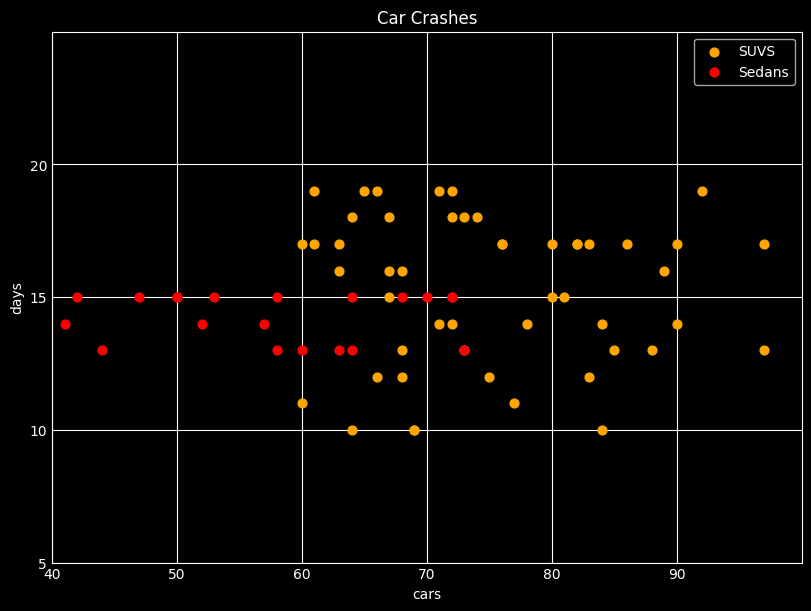

In [2]:
np.random.seed(1) #makes everyone have the same data....

x1 = list(np.random.choice(np.arange(60,100,1),50))  
y1 = list(np.random.choice(np.arange(10,20,1),50))
x2 = list(np.random.choice(np.arange(40,80,1),20))
y2 = list(np.random.choice(np.arange(13,16,1),20))


plt.style.use('_mpl-gallery')                                #gives you the nice (D)
plt.style.use('dark_background')         #dark background, comment this out to change back to white
fig, ax = plt.subplots(figsize=(8,6), layout='constrained')  #sets up the container for plot
ax.scatter(x1,y1,label='SUVS',c='orange',s=40)                  #plot the first red group
ax.scatter(x2,y2,label='Sedans',c='red',s=40)              #plot the second group pf points
ax.set(xlim=(40, 100), xticks=np.arange(40, 100, 10),        #code for generating the x and y ticks
       ylim=(5, 25), yticks=np.arange(5, 25, 5))             #which are part of B,D
ax.set_xlabel('cars')                                        #part of B
ax.set_ylabel('days')                                        #part of B
ax.set_title("Car Crashes")  # Add a title to the axes.      #part A
ax.legend()  # Add a legend.                                 #part C

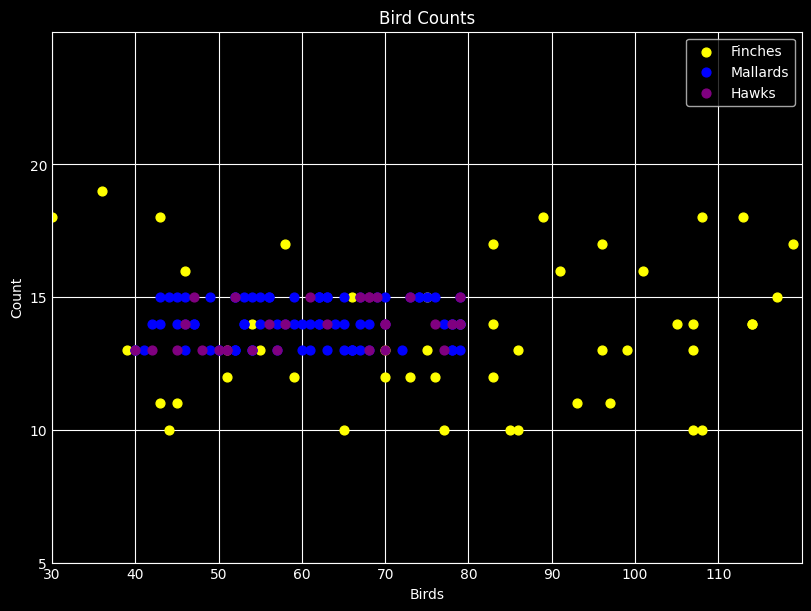

In [3]:
#now you will plot this data
x1 = list(np.random.choice(np.arange(30,120,1),50))  
y1 = list(np.random.choice(np.arange(10,20,1),50))
x2 = list(np.random.choice(np.arange(40,80,1),80))
y2 = list(np.random.choice(np.arange(13,16,1),80))
x3 = list(np.random.choice(np.arange(40,80,1),30))
y3 = list(np.random.choice(np.arange(13,16,1),30))

#x1,y1 are data points from Finches use the color yellow
#x2,y2 are data points from Mallards use the color blue
#x3,y3 are data points from Hawks use the color purple

plt.style.use('_mpl-gallery')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8,6), layout='constrained')
ax.scatter(x1,y1,label='Finches',c='yellow',s=40)              
ax.scatter(x2,y2,label='Mallards',c='blue',s=40)   
ax.scatter(x3,y3,label='Hawks',c='purple',s=40)              
ax.set(xlim=(30, 120), xticks=np.arange(30, 120, 10),
       ylim=(5, 25), yticks=np.arange(5, 25, 5))
ax.set_xlabel('Birds')
ax.set_ylabel('Count')
ax.set_title("Bird Counts")  # Add a title to the axes.
ax.legend()  # Add a legend.

### [Part 2 20 pts] Stream Graph (Stacked Area Plot)
Next we will try to make use of multiple time series data to compare overall effects. When you stack multiple line plots you end up amplifying common time points and smoothing differing ones. See the example first before trying to plot the stock data set.

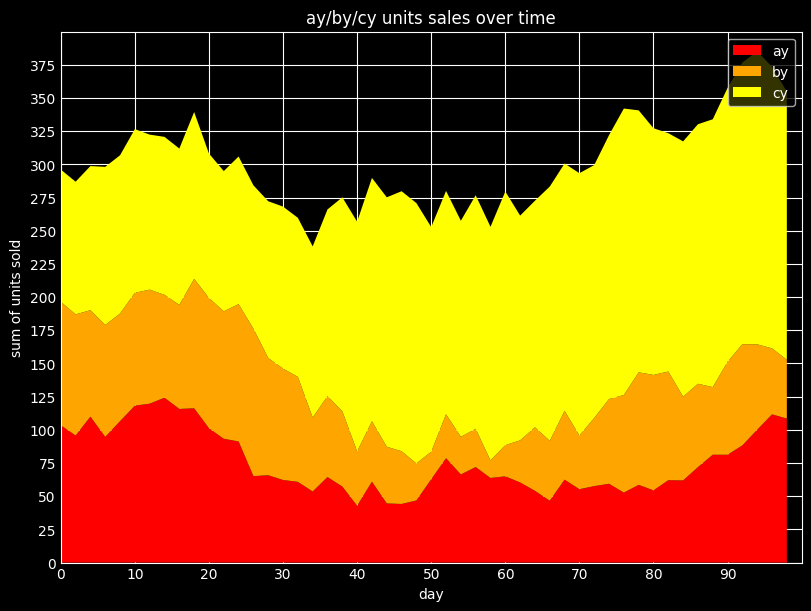

In [4]:
from scipy.stats import norm
np.random.seed(110) #helps to be able to set the y axis limits...

sc,dt=10,0.1
ay,ays = 100.0,[]
for i in range(50):
    ay  += norm.rvs(scale=sc**2*dt)+0.2
    ays += [ay]
    
by,bys = 100.0,[]
for i in range(50):
    by  += norm.rvs(scale=sc**2*dt)-0.25
    bys += [by]
    
cy,cys = 100.0,[]
for i in range(50):
    cy  += norm.rvs(scale=sc**2*dt)+1+0.6
    cys += [cy]

# make data
x = np.arange(0, 100, 2)
y = np.vstack([ays, bys, cys])

# plot
fig, ax = plt.subplots(figsize=(8,6), layout='constrained')
ax.stackplot(x, y, labels = ['ay','by','cy'],colors=['red','orange','yellow'])
ax.set(xlim=(0, 100), xticks=np.arange(0, 100, 10),         #code for generating the x and y ticks
       ylim=(0, 400), yticks=np.arange(0, 400, 25))         #which are part of B,D
ax.set_xlabel('day')                                        #part of B
ax.set_ylabel('sum of units sold')                          #part of B
ax.set_title("ay/by/cy units sales over time")              # Add a title to the axes.      #part A
ax.legend()  # Add a legend.                                #part C

In [5]:
import glob
from datetime import datetime

def get_date(s):
    return datetime.strptime(s,'%Y-%m-%d') #your code should go here...

def read_stock(path):
    with open(path,'r') as f: 
        raw    = [row.replace('\n','').split(',') for row in f.readlines()]
        header = raw[0]
        dates,prices   = [],[]
        for row in raw[1:]:
            dates  += [get_date(row[0])]            #same as: data.append(get_date(row[0]))
            prices += [[float(x) for x in row[1:]]] #converts the: open,high,low,close,adjclose,volume column values
    return np.asarray(dates),np.asarray(prices)

dates,prices = read_stock(glob.glob('stocks/*.csv')[0])
dates[1:10],prices[1:10,0]

(array([datetime.datetime(2018, 10, 5, 0, 0),
        datetime.datetime(2018, 10, 8, 0, 0),
        datetime.datetime(2018, 10, 9, 0, 0),
        datetime.datetime(2018, 10, 10, 0, 0),
        datetime.datetime(2018, 10, 11, 0, 0),
        datetime.datetime(2018, 10, 12, 0, 0),
        datetime.datetime(2018, 10, 15, 0, 0),
        datetime.datetime(2018, 10, 16, 0, 0),
        datetime.datetime(2018, 10, 17, 0, 0)], dtype=object),
 array([9.15, 9.1 , 9.23, 8.95, 8.82, 8.95, 8.67, 8.87, 8.8 ]))

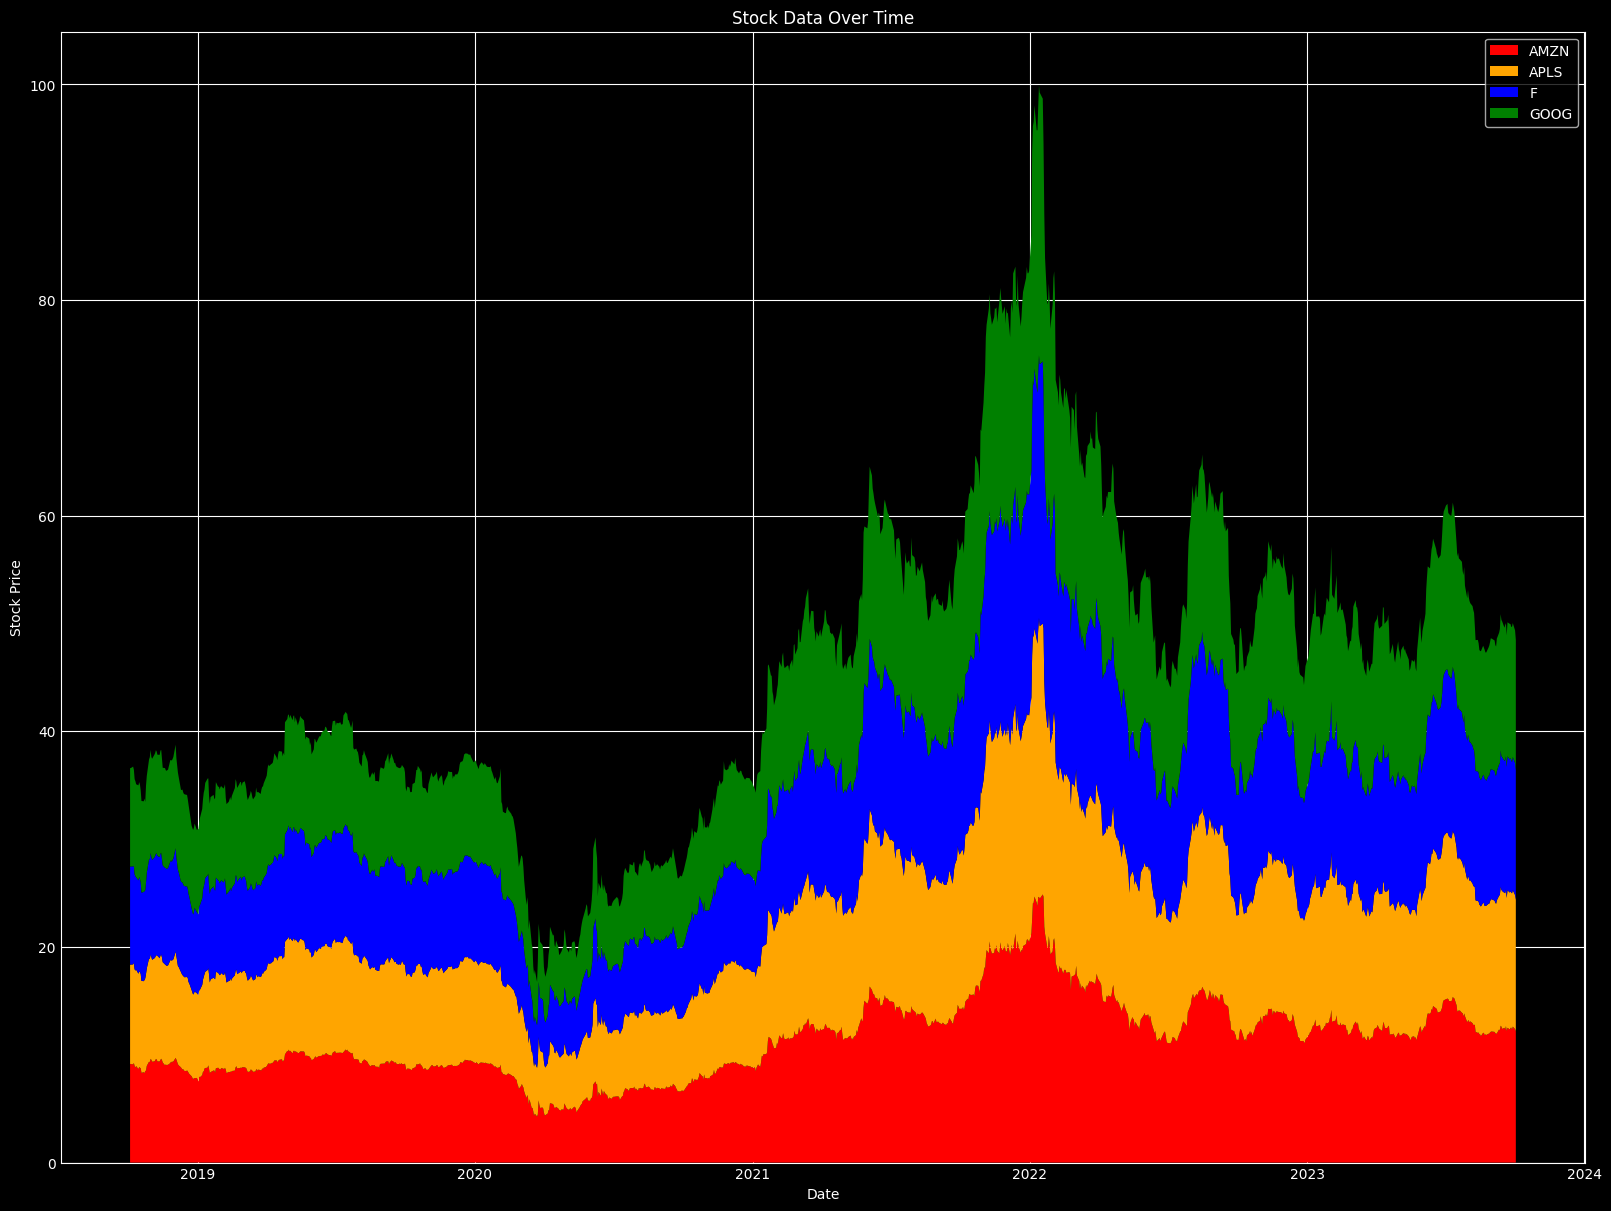

In [6]:
#now you need to plot (using stackedplot above) two or more of the included stock files: AMZN.csv, APLS.csv, F.csv, GOOG.csv, HMC.csv, TSLA.csv

x = dates
fig, ax = plt.subplots(figsize=(16,12), layout='constrained')
ax.stackplot(x, prices[:,0:4].T, labels = ['AMZN','APLS', 'F', 'GOOG'],colors=['red','orange', 'blue', 'green'])
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title("Stock Data Over Time")
ax.legend()

### [Part 3 20 pts] Box Plots show the distributions of different groups side-by-side
First look at the example code to see how three datasets can be ploted as boxplots then go on to plot the four data set: D4,D5,D6,D7

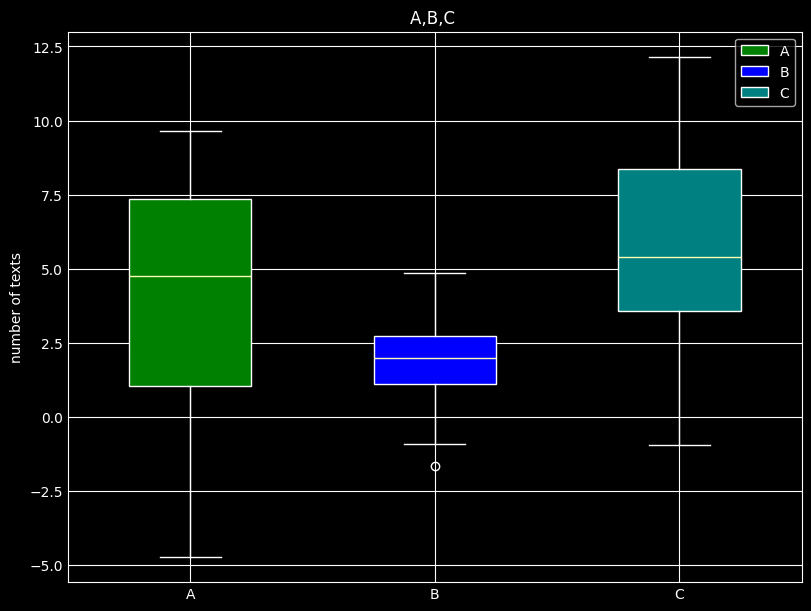

In [7]:
# make data:
np.random.seed(10)
D1 = np.random.normal(3, 5, 4)
D2 = np.random.normal(1.25,3.00,12)
D3 = np.random.normal(5,3.00,25)

# plot
fig, ax = plt.subplots(figsize=(8,6), layout='constrained')
B1 = ax.boxplot(D1, positions=[1], widths=0.5, patch_artist=True, boxprops=dict(facecolor="green"))
B2 = ax.boxplot(D2, positions=[2], widths=0.5, patch_artist=True, boxprops=dict(facecolor="blue"))
B3 = ax.boxplot(D3, positions=[3], widths=0.5, patch_artist=True, boxprops=dict(facecolor="teal"))

plt.xticks([1, 2, 3], ['A', 'B', 'C'])   #this serves as the x-axis
ax.set_ylabel('number of texts')         #part of B serving as y-axis
ax.set_title("A,B,C ")                   # Add a title to the axes.      #part A
ax.legend([B1["boxes"][0], 
           B2["boxes"][0], 
           B3["boxes"][0]], 
          ['A', 'B', 'C'], 
          loc='upper right')             #this is part C

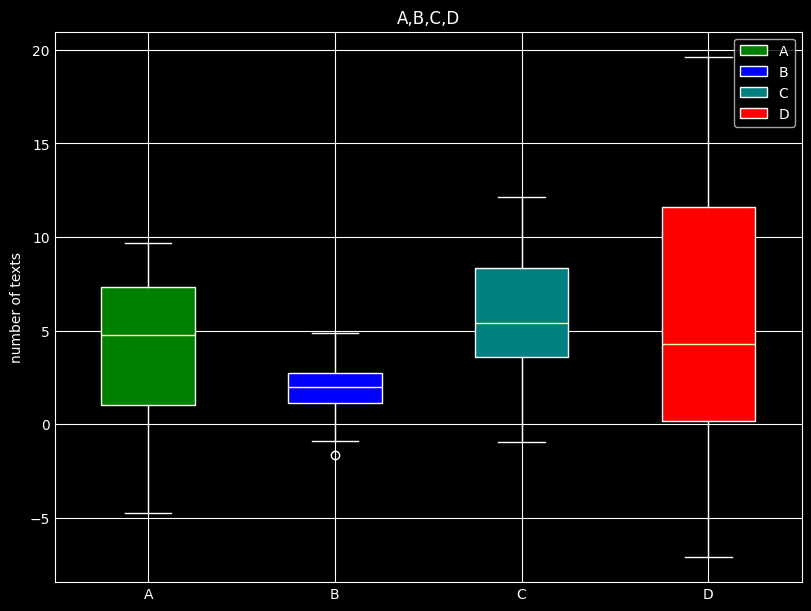

In [8]:
D4 = np.random.normal(7, 15, 14)
D5 = np.random.normal(6.25,1.00,10)
D6 = np.random.normal(10,3.00,25)
D7 = np.random.normal(1,2.0,30)
#your code here to plot D4,D5,D6,D7 as boxplots

fig, ax = plt.subplots(figsize=(8,6), layout='constrained')
B1 = ax.boxplot(D1, positions=[1], widths=0.5, patch_artist=True, boxprops=dict(facecolor="green"))
B2 = ax.boxplot(D2, positions=[2], widths=0.5, patch_artist=True, boxprops=dict(facecolor="blue"))
B3 = ax.boxplot(D3, positions=[3], widths=0.5, patch_artist=True, boxprops=dict(facecolor="teal"))
B4 = ax.boxplot(D4, positions=[4], widths=0.5, patch_artist=True, boxprops=dict(facecolor="red"))

plt.xticks([1, 2, 3, 4], ['A', 'B', 'C', 'D'])
ax.set_ylabel('number of texts')
ax.set_title("A,B,C,D")
ax.legend([B1["boxes"][0], 
           B2["boxes"][0], 
           B3["boxes"][0],
           B4["boxes"][0],], 
          ['A', 'B', 'C', 'D'], 
          loc='upper right')


### [Part 4 20 pts] Pie chart is a quick and easy way to check data sizes
A piechart shows the proportions of data and is a good way to do a group comparison. This variation called a doughnut plot gives more space. The difficult part of the plot to code is to make the annotations or labels to connect to each corresponding section. Can you modify this plot to work with D4,D5,D6,D7?

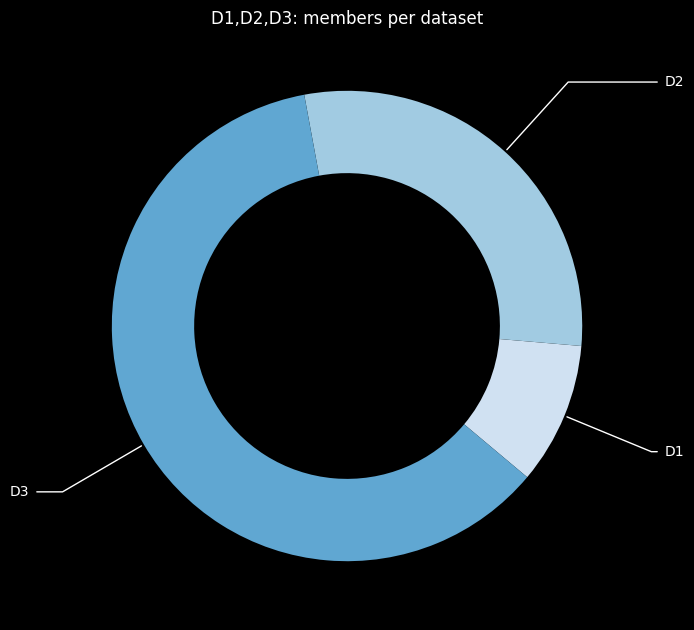

In [9]:
plt.style.use('_mpl-gallery-nogrid')

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, 4))

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie([len(D1),len(D2),len(D3)], colors=colors,wedgeprops=dict(width=0.35), startangle=-40)
ax.set_title("D1,D2,D3: members per dataset")

labels = ["D1","D2","D3"]
bbox_props = dict(boxstyle="square,pad=0.3", fc="k", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

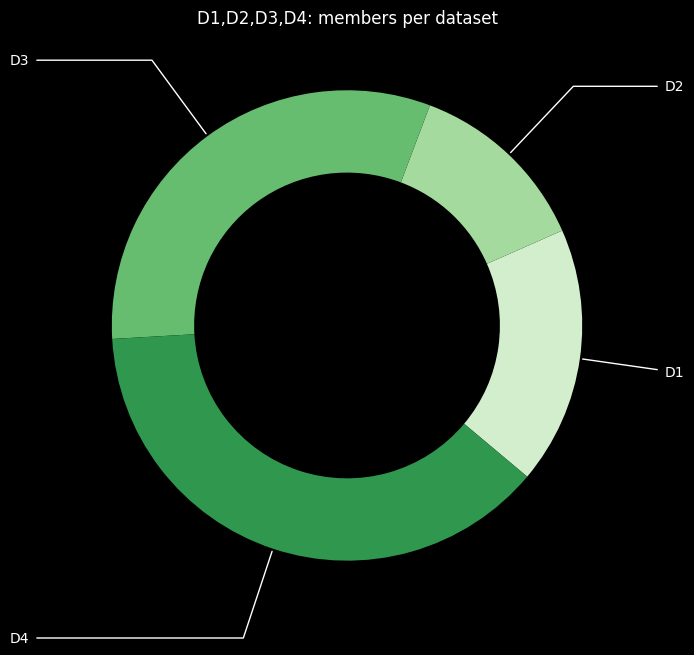

In [10]:
#your doughnut code for D4,D5,D6,D7 here
plt.style.use('_mpl-gallery-nogrid')

colors = plt.get_cmap('Greens')(np.linspace(0.2, 0.7, 4))

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie([len(D4),len(D5),len(D6), len(D7)], colors=colors,wedgeprops=dict(width=0.35), startangle=-40)
ax.set_title("D1,D2,D3,D4: members per dataset")

labels = ["D1","D2","D3","D4"]
bbox_props = dict(boxstyle="square,pad=0.3", fc="k", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

### [Part 5 20 pts] Share your thoughts!
How was the difficulty level of this lab? Did you enjoy a specific data or plot tat was shown here? Do you think you would try to use python3/matplotlib on your presentation/poster or other project for another course?

I think that even though this LAB was shorter than the old labs, it was definitely hard to complete. Because plotting data requires a lot of input (xlim, ylim, figsize, etc.) which I have to consider while programming. 

I'll definitely use plots in my future projects because it's very helpful to illustrate the data to anyone who's interested in. Specifically I think that plotting is very helpful in my statistics class which we do it with R.

I liked this lab a lot and would like to work on plotting more. 